In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from tqdm import tqdm_notebook as tqdm

<a id="contents"></a>

## Contents

<a href=#ex2.5>Exercise 2.5</a><br>
<a href=#ex2.6>Exercise 2.6</a><br>
<a href=#ex2.7>Exercise 2.7</a><br>
<a href=#ex2.14>Exercise 2.14</a><br>
<a href=#ex2.15>Exercise 2.15</a><br>

<a id="ex2.5"></a>

### Ex 2.5

Case N=5, B=1, K=5

In [47]:
np.random.choice([1, 0], replace=True, p=[0.2, 0.8], size=5)

array([0, 0, 0, 0, 1])

Expectation of the number of black balls: 1  (N * B/K)

In [2]:
trials = []
for i in range(10000):
    trials.append(np.random.choice([1, 0], replace=True, p=[0.2, 0.8], size=5).sum())
np.mean(trials)

0.99199999999999999

Probability distribution of the number of black balls

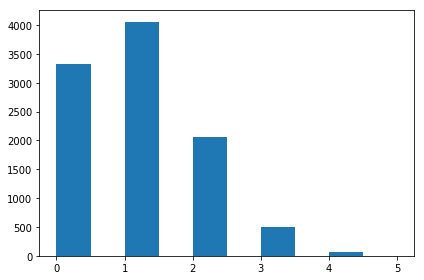

In [3]:
plt.hist(trials)
plt.tight_layout()

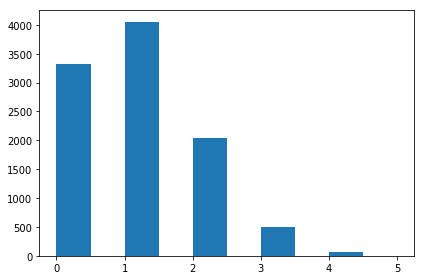

In [4]:
trials_bin = []
for i in range(10000):
    trials_bin.append(np.random.binomial(5, 0.2))
plt.hist(trials_bin)
plt.tight_layout()

Expectation of z

In [5]:
def z(N, B, K):
    nb = np.random.choice([1, 0], replace=True, p=[B/K, 1-(B/K)], size=N).sum()
    fb = B/K
    return ((nb - fb*N) ** 2) / (N*fb*(1 - fb))

In [6]:
trials_z = [z(5,1,5) for i in range(10000)]

In [7]:
np.mean(trials_z)

0.99937500000000001

Distribution of z

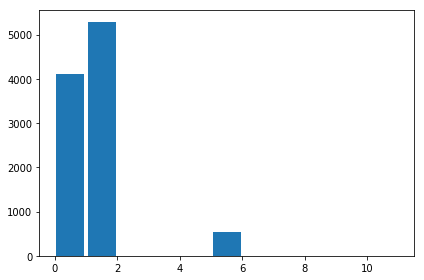

In [16]:
plt.hist(trials_z, bins=range(12), rwidth=0.9)
plt.tight_layout()

Probability of z<1

In [17]:
4000/10000

0.4

<a href=#contents>Back to contents</a>

<a id="ex2.6"></a>

### Example 2.6

$P(u | n_B, N) = \frac{P(n_B | u, N) P(u)}{P(n_B | N)}$

Since there are 11 urns,

$P(u) = \frac{1}{11}$

The probability of a black ball is $\frac{u}{10}$ and the binomial coefficient indicates the number of possible combinations of nB back balls.

$P(n_B | u,N) = \binom{N}{n_B}\frac{u}{10}^{n_B}{(1-\frac{u}{10})}^{N-n_B}$

The remaining term is just a summation over all possible urns of the probability of nB and the urn in question.

$P(n_B | N) = \sum_{u}P(n_B,u | N)$

Applying the sum rule,

$\sum_{u}P(n_B,u | N) = \sum_{u}P(u)P(n_B | u,N) = \frac{1}{11}\sum_{u}P(n_B | u,N)$

In [2]:
def prob_nb_given_u_N(nb, u, N):
    return comb(N,nb) * (u/10)**(nb) * (1-u/10)**(N-nb)

In [3]:
def prob_u_given_nb_N(u, nb, N):
    den = 0
    for i in range(11):
        den += prob_nb_given_u_N(nb, i, N)
    
    return prob_nb_given_u_N(nb, u, N) / den

nB = 3, N = 10

In [4]:
for u in range(11):
    print("Urn", u, ":", prob_u_given_nb_N(u, 3, 10))

Urn 0 : 0.0
Urn 1 : 0.0630726246485
Urn 2 : 0.221239787968
Urn 3 : 0.293219859896
Urn 4 : 0.236255574358
Urn 5 : 0.128778505586
Urn 6 : 0.0466677677744
Urn 7 : 0.00989204858457
Urn 8 : 0.000864217921748
Urn 9 : 9.61326393058e-06
Urn 10 : 0.0


In [5]:
probs = [prob_u_given_nb_N(u, 3, 10) for u in range(11)]

<BarContainer object of 11 artists>

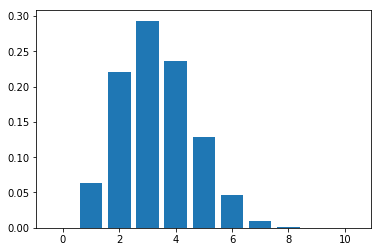

In [6]:
plt.bar(np.arange(0,11), probs)

Given the same case, what is the probability of the next ball being black?

We multiply the probability of drawing a black ball in a particular urn and the probability of the urn itself, then add them, thus considering all possibilities.

$P = \sum_{u=0}^{11}\frac{u}{10} P(nB=3,u | N=10)$

In [11]:
P = 0
for u in range(11):
    P += u/10 * probs[u]
print(P)

0.333037781512


<a href=#contents>Back to contents</a>

<a id="ex2.7"></a>

### Exercise 2.7

In the previous exercise, u was a discrete variable $u \in {[0, 1, ... , 10]}$, whereas now $f_H$ is continuous $f_H \in{[0, 1]}$

$P(f_H | n_H, N) = \frac{P(n_H | f_H, N) P(f_H)}{P(n_H | N)}$

$P(f_H) = 1$

$P(n_H | f_H,N) = \binom{N}{n_H}f_H^{n_H}{(1-f_H)}^{N-n_H}$

$P(n_H|N) = \int_{0}^{1}P(n_H, df_H|N) P(fh) = \int_{0}^{1}df_HP(n_H|df_H, N) P(fh) = \frac{n_H!(N-n_H)!}{(N + 1)!}$

NOTE: Beta integral is NOT useful

Prior distribution: All $f_H$ ranges have a likelihood proportional to their span

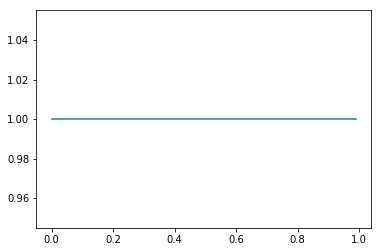

In [3]:
plt.plot(np.arange(0, 1, 0.01), [1] * np.arange(0, 1, 0.01).shape[0])

In [4]:
def factorial(n):
    if (n == 1) or (n == 0):
        return 1
    else:
        return n * factorial(n-1)

In [5]:
def prob_nh_given_fh_N(nh, fh, N):
    return comb(N,nh) * fh**(nh) * (1-fh)**(N-nh)

In [6]:
def prob_nh_given_N(nh, N):
    #return factorial(nh) * factorial(N-nh) / factorial(N+1)
    return np.trapz([prob_nh_given_fh_N(nh, fh, N) for fh in np.arange(0, 1, 0.01)], dx=0.01)

In [7]:
def prob_fh_given_nh_N(fh, nh, N):
    return prob_nh_given_fh_N(nh, fh, N) / prob_nh_given_N(nh, N)

a) $N = 3, n_H = 0$

<b>Probability density distribution</b>

In [8]:
probs_fh_a = [prob_fh_given_nh_N(fh, 0, 3) for fh in np.arange(0, 1, 0.01)]

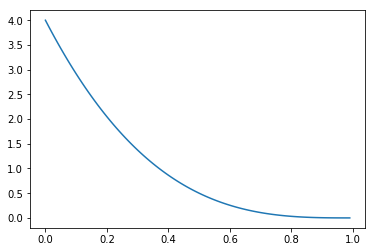

In [9]:
plt.plot(np.arange(0, 1, 0.01), probs_fh_a)

Area under curve is aproximately 1

In [10]:
np.trapz(np.array(probs_fh_a), dx=0.01)

0.99999999999999989

<b>Probability of heads in the next trial:</b><br>
Integrate the product of the probabilities of each fh range by the fh range

In [11]:
np.trapz(np.arange(0, 1, 0.01) * probs_fh_a, dx=0.01)

0.19994665753317981

b) $N = 3, n_H = 2$

In [12]:
probs_fh_b = [prob_fh_given_nh_N(fh, 2, 3) for fh in np.arange(0, 1, 0.01)]

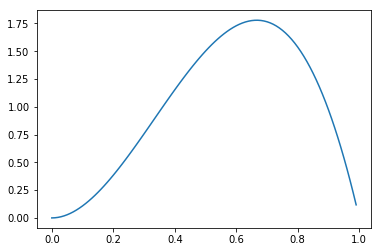

In [13]:
plt.plot(np.arange(0, 1, 0.01), probs_fh_b)

In [14]:
np.trapz(np.arange(0, 1, 0.01) * probs_fh_b, dx=0.01)

0.59973047515073208

c) $N = 10, n_H = 3$

In [15]:
probs_fh_c = [prob_fh_given_nh_N(fh, 3, 10) for fh in np.arange(0, 1, 0.01)]

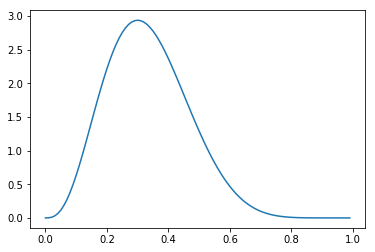

In [16]:
plt.plot(np.arange(0, 1, 0.01), probs_fh_c)

In [17]:
np.trapz(np.arange(0, 1, 0.01) * probs_fh_c, dx=0.01)

0.33333329673993672

d) $N = 100, n_H = 29$

In [18]:
probs_fh_d = [prob_fh_given_nh_N(fh, 29, 100) for fh in np.arange(0, 1, 0.01)]

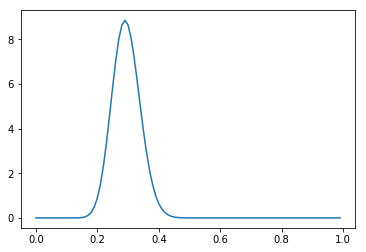

In [19]:
plt.plot(np.arange(0, 1, 0.01), probs_fh_d)

In [20]:
np.trapz(np.arange(0, 1, 0.01) * probs_fh_d, dx=0.01)

0.29411764705882348

What if the prior probability had a different distribution?

In [21]:
priors = [4*x for x in np.arange(0, 0.5, 0.01)] + [-4*x + 4 for x in np.arange(0.5, 1, 0.01)]

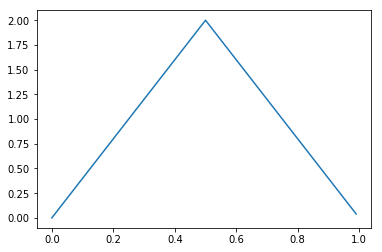

In [22]:
plt.plot(np.arange(0, 1, 0.01), priors)

In [23]:
probs_fh_aa = np.array([prob_fh_given_nh_N(fh, 0, 3) for fh in np.arange(0, 1, 0.01)]) * np.array(priors) / \
np.trapz(np.array([prob_fh_given_nh_N(fh, 0, 3) for fh in np.arange(0, 1, 0.01)]) * np.array(priors), dx=0.01)

Text(0.5, 1.0, 'N=3 nh=0')

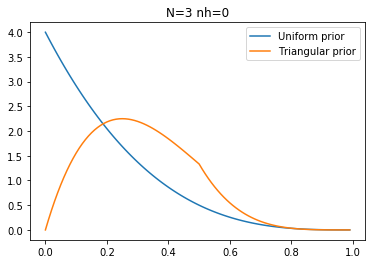

In [29]:
plt.plot(np.arange(0, 1, 0.01), probs_fh_a)
plt.plot(np.arange(0, 1, 0.01), probs_fh_aa)
plt.legend(["Uniform prior", "Triangular prior"])
plt.title("N=3 nh=0")

In [26]:
print("Area under curve for uniform prior: ", np.trapz(probs_fh_a, dx=0.01))
print("Area under curve for triangular prior: ", np.trapz(probs_fh_aa, dx=0.01))

Area under curve for uniform prior:  1.0
Area under curve for triangular prior:  1.0


In [30]:
probs_fh_dd = np.array([prob_fh_given_nh_N(fh, 29, 100) for fh in np.arange(0, 1, 0.01)]) * np.array(priors) / \
np.trapz(np.array([prob_fh_given_nh_N(fh, 29, 100) for fh in np.arange(0, 1, 0.01)]) * np.array(priors), dx=0.01)

Text(0.5, 1.0, 'N=100 nh=29')

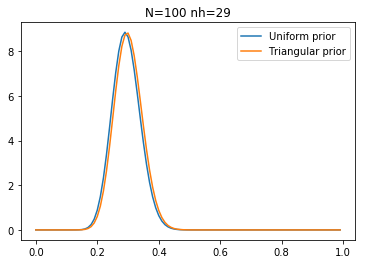

In [32]:
plt.plot(np.arange(0, 1, 0.01), probs_fh_d)
plt.plot(np.arange(0, 1, 0.01), probs_fh_dd)
plt.legend(["Uniform prior", "Triangular prior"])
plt.title("N=100 nh=29")

After many trials the two distributions coincide

<a href=#contents>Back to contents</a>

<a id="ex2.14"></a>

### Exercise 2.14

Prove that if f is a convex function, then $E[f(x)] \geq f(E[x])$, where x is a random variable

Let's try it with the convex function $f(x) = x^2$

In [89]:
Efx = []
fEx = []
for i in range(100):
    x = np.random.choice([-2, 0, 2], p=[0.1, 0.8, 0.1], size=1000)
    Efx.append(np.mean(x**2))
    fEx.append(np.mean(x) ** 2)

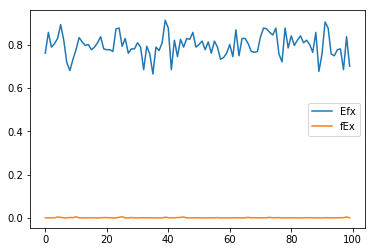

In [93]:
plt.plot(np.arange(100), Efx)
plt.plot(np.arange(100), fEx)
plt.legend(["Efx", "fEx"])

We confirm that $E[f(x)] \geq f(E[x])$

Another way...

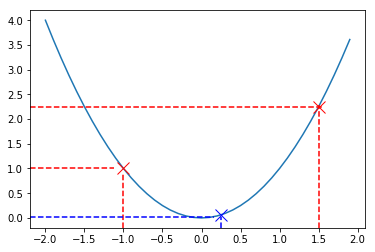

In [73]:
plt.plot(np.arange(-2, 2, 0.1), [x**2 for x in np.arange(-2, 2, 0.1)])
plt.plot([-1, 1.5], [1, 1.5**2], 'rx', markersize=12)
plt.axvline(-1, ymax=0.25, linestyle="--", color="r")
plt.axvline(1.5, ymax=(1.5**2)/4, linestyle="--", color="r")
plt.axhline(1, xmax=0.25, linestyle="--", color="r")
plt.axhline(1.5**2, xmax=(1.5+2)/4, linestyle="--", color="r")
plt.plot([(-1+1.5)/2], [((-1+1.5)/2)**2], "bx", markersize=12)
plt.axvline((-1+1.5)/2, ymax=0.05, linestyle="--", color="b")
plt.axhline(0.025, xmax=0.55, linestyle="--", color="b")

1.625 > 0.0625<br>
$E[f(x)] \geq f(E[x])$

Now a non-convex function $f(x) = x^3$

In [94]:
Efx = []
fEx = []
for i in range(100):
    x = np.random.choice([-2, 0, 2], p=[0.1, 0.8, 0.1], size=1000)
    Efx.append(np.mean(x**3))
    fEx.append(np.mean(x) ** 3)

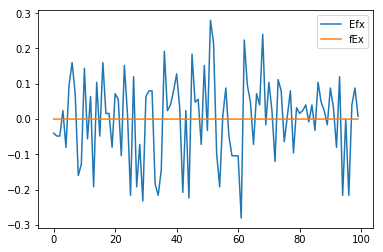

In [95]:
plt.plot(np.arange(100), Efx)
plt.plot(np.arange(100), fEx)
plt.legend(["Efx", "fEx"])

<a href=#contents>Back to contents</a>

<a id="ex2.15"></a>

### Example 2.15

$E[f(x)] = f(E[x])$ <br><br>
$\frac{l_1^2 + l_2^2 + l_3^2}{3} = (\frac{l_1 + l_2 + l_3}{3})^2$ <br>
$l_1 = l_2 = l_3$

<a href=#contents>Back to contents</a>

<a id="ex2.16"></a>

### Exercise 2.16

a) P distribution of the sum of 2 dice rolls

In [2]:
def dice_roll():
    return np.random.choice(np.arange(1,7))

In [43]:
trials_a_sum = [dice_roll() + dice_roll() for i in range(10000)]

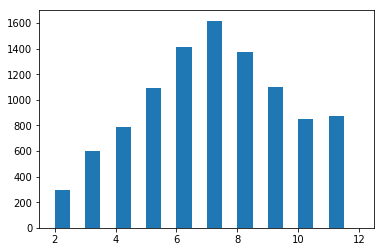

In [44]:
plt.hist(trials_a_sum, width=0.5)
plt.show()

In [45]:
(np.array(trials_a_sum) == 12).sum()

272

In [46]:
trials_a_dif = [abs(dice_roll() - dice_roll()) for i in range(10000)]

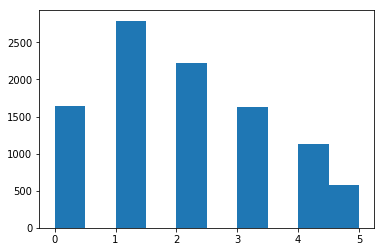

In [53]:
plt.hist(trials_a_dif, width=0.5)
plt.show()

b) P distribution of the sum 100 dice rolls

In [54]:
trials_b = [np.sum([dice_roll() for i in range(100)]) for j in range(1000)]

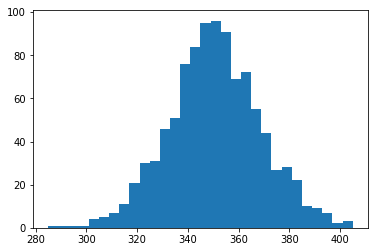

In [60]:
plt.hist(trials_b, bins=30)
plt.show()

In [62]:
np.mean(trials_b), np.std(trials_b)

(350.23099999999999, 18.192790852422835)

6.01663 13.9882134431


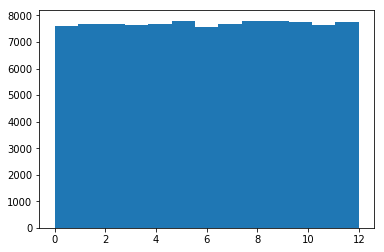

In [83]:
obj = [np.random.choice(np.arange(13)) for _ in range(100000)]
print(np.mean(obj), np.var(obj))
plt.hist(obj, bins=13)
plt.show()

In [84]:
dice_1 = [np.random.choice([0, 2, 1, 4, 5, 6]) for _ in range(1000)]
print(np.mean(dice_1), np.var(dice_1))

2.987 4.778831


In [85]:
dice_2 = [np.random.choice([0, 0, 1, 5, 6, 6]) for _ in range(1000)]
print(np.mean(dice_2), np.var(dice_2))

3.083 7.308111


In [86]:
trials_c = np.array(dice_1) + np.array(dice_2)

In [87]:
np.mean(trials_c), np.var(trials_c)

(6.0700000000000003, 12.235100000000001)

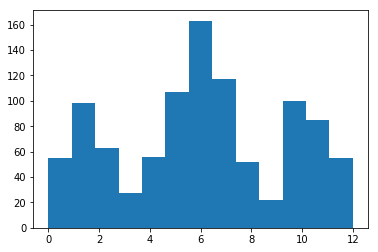

In [88]:
plt.hist(trials_c, bins=13)
plt.show()

In [106]:
np.std([np.random.choice(np.arange(1, 13)) for _ in range(100)])

3.2919750910357752

In [ ]:
dice_labels = np.random.choice(np.arange(7), size=12)

for _ in tqdm(range(100000)):
    trials = [np.random.choice(dice_labels[:6]) + np.random.choice(dice_labels[6:]) for _ in range(1000)]
    counts = np.bincount(trials)
    if (np.max(counts) - np.min(counts)) < 50:
        print(dice_labels)
        break
    else:
        dice_labels[np.random.choice(np.arange(12))] = np.random.choice(np.arange(7))

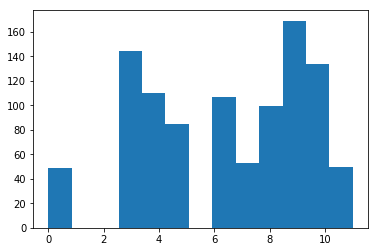

In [22]:
plt.hist(trials, bins=13)
plt.show()

<a href=#contents>Back to contents</a>